## Blackrock ETF Poertfolio Optimization

In [101]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


## Define Tickers and Time Range

Define the list of tickers

In [102]:
assets=['IAU','IVV','AGG','EEM','IYR']

In [103]:
# Assign weights to the etf
weights=np.array([0.2,0.2,0.2,0.2,0.2])

## Stock portfolio starting date

In [104]:
stockStartDate='2015-01-01'

## Set end date to today

In [105]:
today= datetime.today().strftime('%Y-%m-%d')
today

'2025-08-07'

In [106]:
# Create a data frame to store the adjusted close price  of teh stocks
df= pd.DataFrame()

#Store adjsuted close price of stock into df
for stock in assets:
  df[stock]=yf.download(stock,start=stockStartDate,end=today)['Close']

/tmp/ipython-input-305812651.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[stock]=yf.download(stock,start=stockStartDate,end=today)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-305812651.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[stock]=yf.download(stock,start=stockStartDate,end=today)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-305812651.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[stock]=yf.download(stock,start=stockStartDate,end=today)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-305812651.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[stock]=yf.download(stock,start=stockStartDate,end=today)['Close']
[*********************100%***********************]  1 of 

In [107]:
# Show the df
df

,IAU,IVV,AGG,EEM,IYR
Date,,,,,
2015-01-02,23.000000,172.223816,83.327950,30.789446,55.975754
2015-01-05,23.360001,169.199707,83.509048,30.241489,56.162853
2015-01-06,23.580000,167.675156,83.720299,30.114416,56.572998
2015-01-07,23.459999,169.749527,83.705231,30.765631,57.306969
2015-01-08,23.379999,172.781998,83.576965,31.289770,57.630787
...,...,...,...,...,...
2025-07-31,62.009998,634.900024,98.290001,48.560001,94.879997
2025-08-01,63.290001,624.650024,99.139999,48.200001,94.750000
2025-08-04,63.639999,634.169983,99.220001,48.700001,95.709999


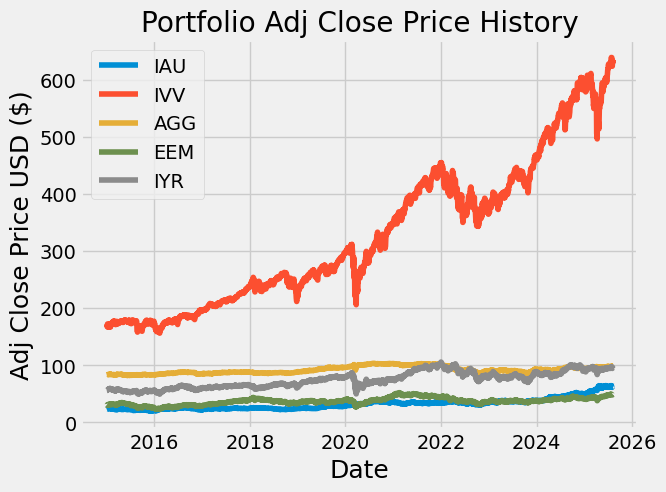

In [108]:
# Visually show the tock/portfolio
title='Portfolio Adj Close Price History'

# Get the stock
my_stocks=df

# Create and plot teh graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)

plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Close Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values,loc='upper left')
plt.show()

In [109]:
# Show the daily simple returns
returns_df=df.pct_change()
returns_df

,IAU,IVV,AGG,EEM,IYR
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.015652,-0.017559,0.002173,-0.017797,0.003343
2015-01-06,0.009418,-0.009010,0.002530,-0.004202,0.007303
2015-01-07,-0.005089,0.012371,-0.000180,0.021625,0.012974
2015-01-08,-0.003410,0.017864,-0.001532,0.017037,0.005651
...,...,...,...,...,...
2025-07-31,0.006329,-0.004094,0.000507,-0.005733,-0.014848
2025-08-01,0.020642,-0.016144,0.008648,-0.007414,-0.001370
2025-08-04,0.005530,0.015240,0.000807,0.010373,0.010132


In [110]:
#   Create ad show the annualized covariancce matrix
cov_matrix_annual=returns_df.cov()*252
cov_matrix_annual

,IAU,IVV,AGG,EEM,IYR
IAU,0.020861,0.001078,0.002731,0.004838,0.003991
IVV,0.001078,0.032833,0.000853,0.028241,0.027221
AGG,0.002731,0.000853,0.002819,0.001168,0.002976
EEM,0.004838,0.028241,0.001168,0.042557,0.023472
IYR,0.003991,0.027221,0.002976,0.023472,0.041214


In [111]:
# Calculate the portfolio variance
port_variance=np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

np.float64(0.013336778218646365)

In [112]:
# Calculate portfolio vlatility (standard deviation)
port_volatility=np.sqrt(port_variance)
port_volatility

np.float64(0.11548496966552126)

In [113]:
# Calculate annual portfolio return
portfolioSimpleAnnualReturn=np.sum(returns_df.mean()*weights)*252
portfolioSimpleAnnualReturn


np.float64(0.08025364538807712)

In [114]:
# show the expected annual return, volatility and variance
percent_var=str(round(port_variance,2)*100)+'%'
percent_vols=str(round(port_volatility,2)*100)+'%'
percent_ret=str(round(portfolioSimpleAnnualReturn,2)*100)+'%'

print('Expected annual return: '+ percent_ret)
print('Annual volatility/standard deviation: '+ percent_vols)
print('Annual variance: '+ percent_var)

Expected annual return: 8.0%
Annual volatility/standard deviation: 12.0%
Annual variance: 1.0%


In [115]:
pip install PyportfolioOpt

In [116]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [117]:
# Portfolio optimization

# Calulate expected returns and annualized simple covariance matrix of asset returns
mu=expected_returns.mean_historical_return(df)
S=risk_models.sample_cov(df)

# Optimize for maximal Sharpe ratio
ef=EfficientFrontier(mu,S)
weights=ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('IAU', 0.52728), ('IVV', 0.4407), ('AGG', 0.03202), ('EEM', 0.0), ('IYR', 0.0)])
Expected annual return: 11.2%
Annual volatility: 11.3%
Sharpe Ratio: 0.99


(np.float64(0.11174841831813363),
 np.float64(0.11312303242472671),
 np.float64(0.987848503729709))